In [1]:
import numpy as np
import tensorflow as tf
from nsa_ivs_dnn import NSA_IVS_DNN

In [2]:
# load data
data = np.genfromtxt("../data/test_data_sabr.csv", delimiter=',').astype('float32')
print(data.shape)
strikes = np.arange(0.7, 1.5, 0.05)
ttms = np.arange(1, 13, 1)

current_iv_grid = np.zeros(16*12)
strike = 5 
ttm = 2

x = np.append(current_iv_grid, [strike, ttm])
x.shape
print(strikes.shape, ttms.shape)

(100, 192)
(16,) (12,)


In [3]:
# create nsa_ivs_dnn
nsa_ivs = NSA_IVS_DNN(data, [strikes, ttms])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                5850      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 7,741
Trainable params: 7,741
Non-trainable params: 0
_________________________________________________________________


In [4]:
# train nsa_ivs_dnn
print(nsa_ivs.dataX.shape)
print(nsa_ivs.dataY.shape)

nsa_ivs.train()

(19200, 194)
(19200, 1)
Epoch 1/30
100/100 [==============================] - 19s 192ms/step - total_loss: 40.4525 - reconstruction_loss: 40.3002 - nsa_C3: 0.0681 - nsa_C4: 0.0161 - nsa_C5: 0.0681 - nsa_C6: 0.0000e+00
Epoch 2/30
100/100 [==============================] - 15s 152ms/step - total_loss: 6.0920 - reconstruction_loss: 5.9263 - nsa_C3: 0.0614 - nsa_C4: 0.0429 - nsa_C5: 0.0614 - nsa_C6: 0.0000e+00
Epoch 3/30
100/100 [==============================] - 16s 164ms/step - total_loss: 0.9482 - reconstruction_loss: 0.8123 - nsa_C3: 0.0642 - nsa_C4: 0.0076 - nsa_C5: 0.0642 - nsa_C6: 0.0000e+00
Epoch 4/30
100/100 [==============================] - 14s 143ms/step - total_loss: 0.5586 - reconstruction_loss: 0.4240 - nsa_C3: 0.0666 - nsa_C4: 0.0013 - nsa_C5: 0.0666 - nsa_C6: 0.0000e+00
Epoch 5/30
100/100 [==============================] - 14s 145ms/step - total_loss: 0.4182 - reconstruction_loss: 0.2846 - nsa_C3: 0.0663 - nsa_C4: 9.6560e-04 - nsa_C5: 0.0663 - nsa_C6: 0.0000e+00
Epoch 6/30

In [5]:
nsa_ivs.save_model("models/nsa_dnn_model")

In [4]:
nsa_ivs.load_model("models/nsa_dnn_model")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                5850      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 7,741
Trainable params: 7,741
Non-trainable params: 0
_________________________________________________________________


In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

(1, 252, 1)
MAPE: 3.956303372979164 %


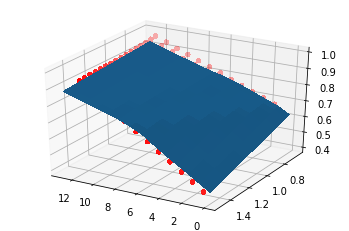

In [7]:
# plot for test data
test_point = 10


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Y = np.meshgrid(np.flip(ttms), np.flip(strikes))

strikes_test = np.arange(0.65, 1.55, 0.05)
ttms_test = np.arange(0, 14, 1)

X_test, Y_test = np.meshgrid(np.flip(ttms_test), np.flip(strikes_test))

Z = np.zeros((ttms_test.shape[0], strikes_test.shape[0]))

x = np.zeros((ttms_test.shape[0]*strikes_test.shape[0], 194))

for i in range(ttms_test.shape[0]):
    for j in range(strikes_test.shape[0]):
        x[i*strikes_test.shape[0]+j] = np.append(data[test_point],[strikes_test[j],ttms_test[i]]).flatten()

Z = nsa_ivs.predict(x)
print(Z.shape)
Z = Z[0].reshape([ttms_test.size,strikes_test.size])

#print(X_test.shape, Y_test.shape, Z.shape)
surf = ax.plot_surface(X_test, Y_test, Z.T, linewidth=0, antialiased=False)

Z2 = data[test_point,:].reshape([ttms.size, strikes.size])
#print(X.shape, Y.shape, Z2.shape)
ax.scatter(X, Y, Z2.T, linewidth=0, antialiased=False, c="red")
#print(Z.shape)
#print(Z2.shape)

mape = np.mean(np.mean(np.abs(Z[1:-1,1:-1]-Z2), axis=0), axis=0)
print("MAPE:",mape * 100, "%")

ax.view_init(30, 120)
plt.show()

In [24]:
mape_vec = np.zeros((100,1))

for test_point in range(100):
    Z = np.zeros((ttms_test.shape[0], strikes_test.shape[0]))

    x = np.zeros((ttms_test.shape[0]*strikes_test.shape[0], 194))

    for i in range(ttms_test.shape[0]):
        for j in range(strikes_test.shape[0]):
            x[i*strikes_test.shape[0]+j] = np.append(data[test_point],[strikes_test[j],ttms_test[i]]).flatten()

    Z = nsa_ivs.predict(x)
    Z = Z[0].reshape([ttms_test.size,strikes_test.size])
    Z2 = data[test_point,:].reshape([ttms.size, strikes.size])
    
    mape_vec[test_point] = np.mean(np.mean(np.abs(Z[1:-1,1:-1]-Z2), axis=0), axis=0)
    
print(np.min(mape_vec),np.max(mape_vec))

0.03296221047639847 0.049690235406160355
